# Example Exploration
This notebook demonstrates basic data loading and model training.

In [28]:
import sys
from pathlib import Path
# Add project root to sys.path so 'src' can be imported
sys.path.append(str(Path().resolve().parent))
import pandas as pd
from src.data_loader import load_csv
from src.model_train import train_model

In [29]:
# Create a sample CSV file for testing
import pandas as pd
import os
os.makedirs('../data', exist_ok=True)
feature1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
feature2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
target = [1 if f1 + f2 > 60 else 0 for f1, f2 in zip(feature1, feature2)]

df_sample = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})
print(df_sample)
df_sample.to_csv('../data/sample_data.csv', index=False)
print('Sample CSV created at ../data/sample_data.csv')

   feature1  feature2  target
0         1        10       0
1         2        20       0
2         3        30       0
3         4        40       0
4         5        50       0
5         6        60       1
6         7        70       1
7         8        80       1
8         9        90       1
9        10       100       1
Sample CSV created at ../data/sample_data.csv


In [30]:
# Load the sample data and train a model
df = load_csv('sample_data.csv')
print('Loaded Data:')
print(df)
model = train_model('sample_data.csv')

Loaded Data:
   feature1  feature2  target
0         1        10       0
1         2        20       0
2         3        30       0
3         4        40       0
4         5        50       0
5         6        60       1
6         7        70       1
7         8        80       1
8         9        90       1
9        10       100       1
Accuracy: 1.00


## Next Steps: Visualize Data and Predictions

Now that you have loaded your data and trained a model, you can:
- Visualize the data and model predictions
- Try different models or parameters
- Add more features or data

Below is an example to visualize the data and predictions.

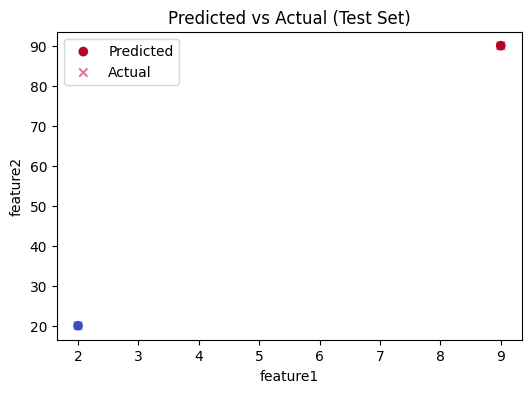

In [31]:
# Visualize the data and model predictions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reload data and split for visualization
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on test set
if hasattr(model, 'predict'):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6,4))
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred, cmap='coolwarm', marker='o', label='Predicted')
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Predicted vs Actual (Test Set)')
    plt.legend(['Predicted','Actual'])
    plt.show()
else:
    print('Model does not support prediction.')

In [14]:
# Create a larger and more varied sample dataset
import numpy as np
import pandas as pd
import os
np.random.seed(42)

n_samples = 1000
feature1 = np.random.uniform(0, 10, n_samples)
feature2 = np.random.uniform(0, 100, n_samples)
# Example: target is 1 if feature1 + feature2 > 60, else 0
threshold = 60
target = (feature1 + feature2 > threshold).astype(int)

df_large = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})
os.makedirs('../data', exist_ok=True)
df_large.to_csv('../data/large_sample_data.csv', index=False)
print('Larger sample CSV created at ../data/large_sample_data.csv')

Larger sample CSV created at ../data/large_sample_data.csv


Loaded Data (first 5 rows):
   feature1   feature2  target
0  3.745401  18.513293       0
1  9.507143  54.190095       1
2  7.319939  87.294584       1
3  5.986585  73.222489       1
4  1.560186  80.656115       1
Accuracy: 1.00


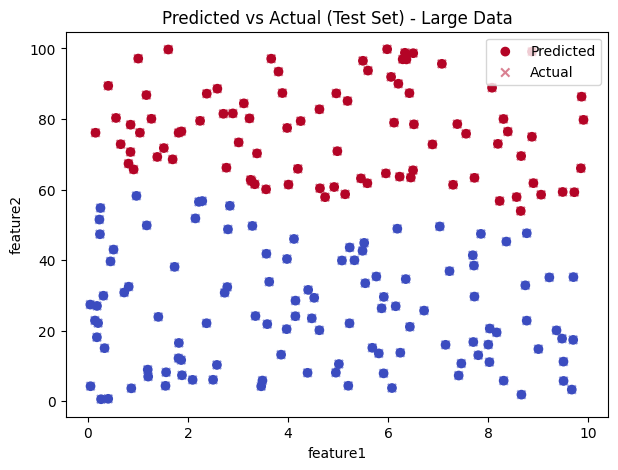

In [15]:
# Load, train, and visualize with the larger dataset
df = load_csv('large_sample_data.csv')
print('Loaded Data (first 5 rows):')
print(df.head())
model = train_model('large_sample_data.csv')

# Visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
if hasattr(model, 'predict'):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(7,5))
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred, cmap='coolwarm', marker='o', label='Predicted')
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Predicted vs Actual (Test Set) - Large Data')
    plt.legend(['Predicted','Actual'])
    plt.show()
else:
    print('Model does not support prediction.')

## Try a Different Model: Random Forest

You can easily swap out the logistic regression for a more powerful model, such as a Random Forest. Below is an example using scikit-learn's RandomForestClassifier.

Loaded Data (first 5 rows):
   feature1   feature2  target
0  3.745401  18.513293       0
1  9.507143  54.190095       1
2  7.319939  87.294584       1
3  5.986585  73.222489       1
4  1.560186  80.656115       1
Random Forest Accuracy: 1.00


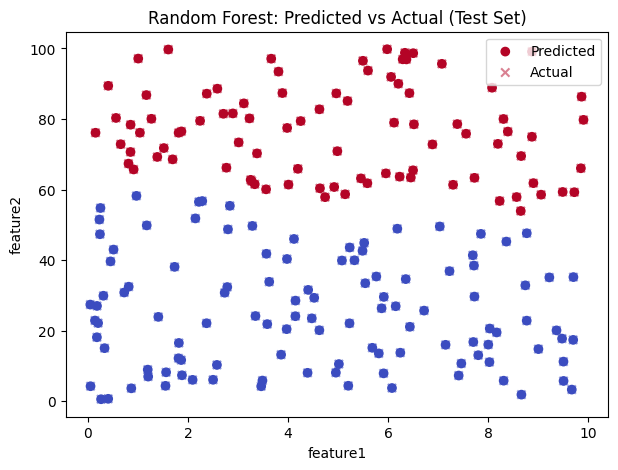

In [16]:
# Train and visualize with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = load_csv('large_sample_data.csv')
print('Loaded Data (first 5 rows):')
print(df.head())
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred, cmap='coolwarm', marker='o', label='Predicted')
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Random Forest: Predicted vs Actual (Test Set)')
plt.legend(['Predicted','Actual'])
plt.show()

## Next Steps

- Try more advanced models (e.g., SVM, Gradient Boosting)
- Add feature engineering or preprocessing
- Evaluate with cross-validation
- Explore model interpretability (feature importance, SHAP, etc.)


SVM Accuracy: 0.99


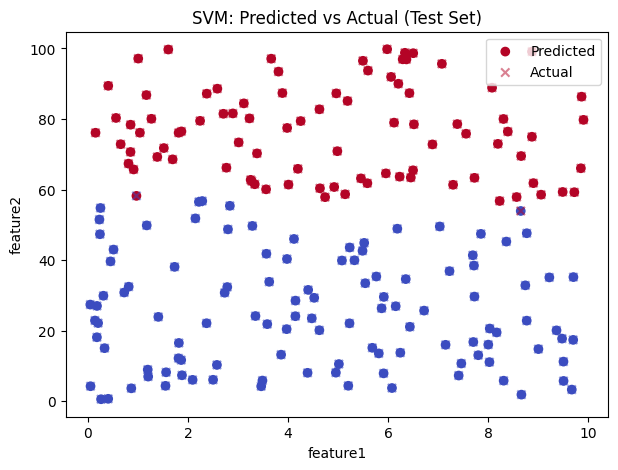

Gradient Boosting Accuracy: 1.00


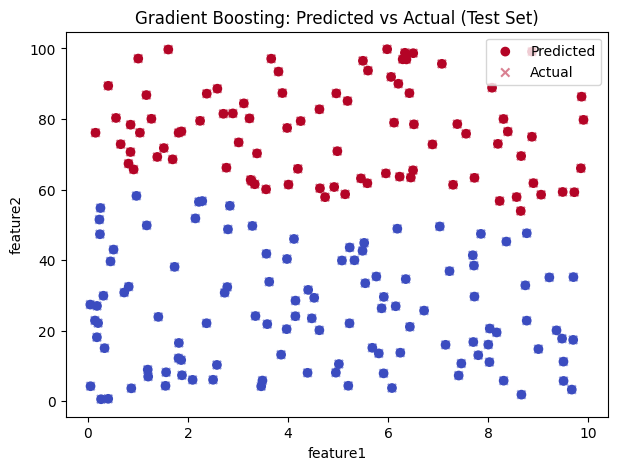

In [17]:
# Try SVM and Gradient Boosting models
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred_svm, cmap='coolwarm', marker='o', label='Predicted')
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('SVM: Predicted vs Actual (Test Set)')
plt.legend(['Predicted','Actual'])
plt.show()

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {acc_gb:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred_gb, cmap='coolwarm', marker='o', label='Predicted')
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Gradient Boosting: Predicted vs Actual (Test Set)')
plt.legend(['Predicted','Actual'])
plt.show()